------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Business Problem

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()

### Loading DataFrame

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/saifghostrider454/VehicleInsurancePrediction/main/datafile/TRAIN_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.csv')

### DataFrame First Look

In [3]:
dataframe.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
291049,291050,Male,44,1,46.0,0,1-2 Year,Yes,29671.0,26.0,199,0
339434,339435,Male,22,1,10.0,1,< 1 Year,No,28999.0,152.0,106,0
323190,323191,Female,30,1,28.0,1,< 1 Year,No,42741.0,152.0,91,0


### Shape

In [4]:
print(f"This DataFrame Has {dataframe.shape[0]} Rows and {dataframe.shape[1]} Columns")

This DataFrame Has 381109 Rows and 12 Columns


### DataFrame Info

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Data Description

In [6]:
dataframe.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Any Null Values

In [7]:
dataframe.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##### There is 0 null value

### Univarient & Bivarient Analysis

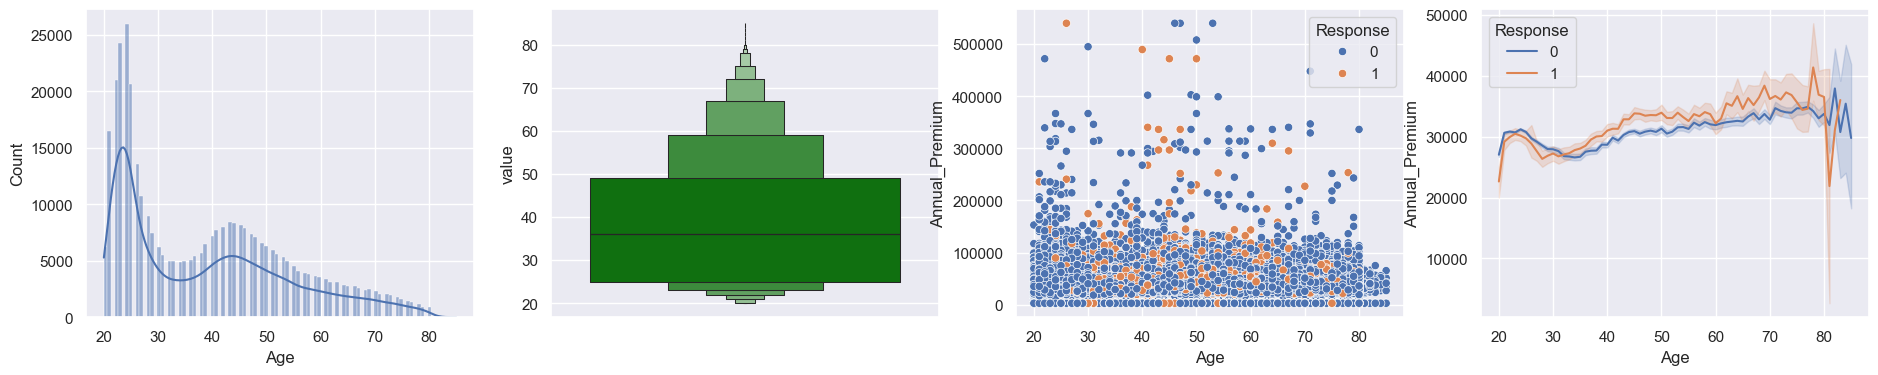

In [8]:
# For Age Variable
fig, ax = plt.subplots(1, 4, figsize=[23, 4])

sns.histplot(data=dataframe, x='Age', ax=ax[0], kde=True)
sns.boxenplot(y='value', data=pd.melt(dataframe[['Age']]), color='green', ax=ax[1])
sns.scatterplot(x=dataframe.Age, y=dataframe.Annual_Premium, ax=ax[2], hue=dataframe.Response)
sns.lineplot(data=dataframe, x='Age', y='Annual_Premium', ax=ax[3], hue='Response')

plt.savefig('Age.png')
plt.show()

In [9]:
dataframe.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
301751,301752,Male,47,1,37.0,0,1-2 Year,Yes,37342.0,26.0,182,0
162921,162922,Male,75,1,28.0,0,1-2 Year,Yes,54224.0,26.0,184,0
328924,328925,Male,21,1,36.0,1,< 1 Year,Yes,22849.0,152.0,28,0


In [10]:
gender_vs_license = dataframe.groupby(['Gender', 'Driving_License']).size().reset_index(name='count')
gender_vs_license

,Gender,Driving_License,count
0,Female,0,212
1,Female,1,174808
2,Male,0,600
3,Male,1,205489


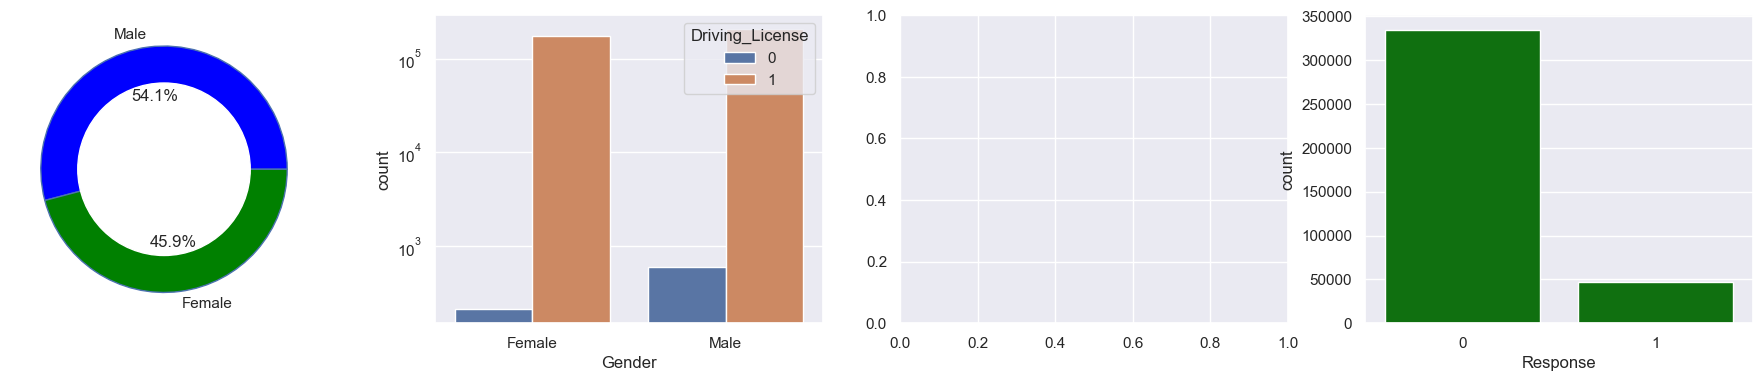

In [17]:
fig, ax = plt.subplots(1, 4, figsize=[23, 4])

# Get the count values for each category
gender_counts = dataframe['Gender'].value_counts()

# Create a donut plot using Matplotlib
ax[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'green'],
          wedgeprops=dict(width=0.4, edgecolor='b'))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax[0].add_artist(centre_circle)


ax = sns.barplot(data=gender_vs_license, x='Gender', y='count', hue='Driving_License', ax=ax[1])

# Set y-axis to logarithmic scale
ax.set_yscale('log')



sns.countplot(data=dataframe, x='Response', color='green')
# Show the plot
plt.show()


In [19]:
dataframe.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [20]:
dataframe.groupby(['Gender', 'Previously_Insured', 'Response']).size()

Gender  Previously_Insured  Response
Female  0                   0           68948
                            1           18123
        1                   0           87887
                            1              62
Male    0                   0           90981
                            1           28429
        1                   0           86583
                            1              96
dtype: int64

In [24]:
grouped_df = dataframe.groupby(['Gender', 'Previously_Insured', 'Response'], as_index=False).size()

# Calculate the total count for each group
total_count_df = dataframe.groupby(['Gender', 'Previously_Insured']).size().reset_index(name='Total_Count')

# Merge the two DataFrames
result_df = pd.merge(grouped_df, total_count_df, on=['Gender', 'Previously_Insured'])

# Calculate the Percentage column
result_df['Percentage'] = round(result_df['size'] / result_df['Total_Count'] * 100, 2)

# Drop unnecessary columns if needed
result_df = result_df.drop(['size', 'Total_Count'], axis=1)

result_df

,Gender,Previously_Insured,Response,Percentage
0,Female,0,0,79.19
1,Female,0,1,20.81
2,Female,1,0,99.93
3,Female,1,1,0.07
4,Male,0,0,76.19
5,Male,0,1,23.81
6,Male,1,0,99.89
7,Male,1,1,0.11


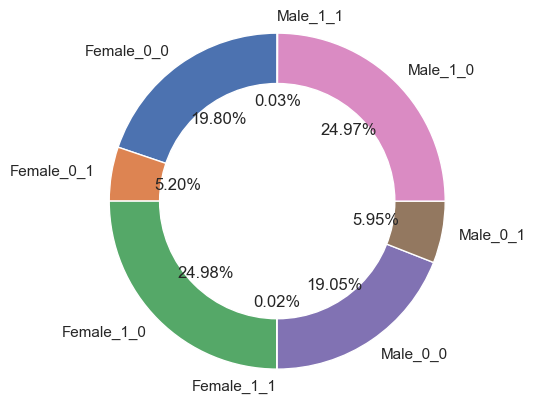

In [26]:
labels = []
sizes = []

for index, row in result_df.iterrows():
    label = f"{row['Gender']}_{row['Previously_Insured']}_{row['Response']}"
    labels.append(label)
    sizes.append(row['Percentage'])

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')


plt.savefig('gender_vs_previousinsured_vs_response.png')
# Display the plot
plt.show()

In [27]:
dataframe.sample()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
114007,114008,Male,24,1,27.0,0,< 1 Year,Yes,2630.0,152.0,47,0


In [28]:
grouped_df = dataframe.groupby(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], as_index=False).size()

# Calculate the total count for each group
total_count_df = dataframe.groupby(['Gender', 'Vehicle_Age']).size().reset_index(name='Total_Count')

# Merge the two DataFrames
result_df = pd.merge(grouped_df, total_count_df, on=['Gender', 'Vehicle_Age'])

# Calculate the Percentage column
result_df['Percentage'] = round(result_df['size'] / result_df['Total_Count'] * 100, 2)

# Drop unnecessary columns if needed
result_df = result_df.drop(['size', 'Total_Count'], axis=1)

result_df

,Gender,Vehicle_Age,Vehicle_Damage,Percentage
0,Female,1-2 Year,No,37.57
1,Female,1-2 Year,Yes,62.43
2,Female,< 1 Year,No,72.32
3,Female,< 1 Year,Yes,27.68
4,Female,> 2 Years,No,0.14
5,Female,> 2 Years,Yes,99.86
6,Male,1-2 Year,No,34.98
7,Male,1-2 Year,Yes,65.02
8,Male,< 1 Year,No,68.80
9,Male,< 1 Year,Yes,31.20


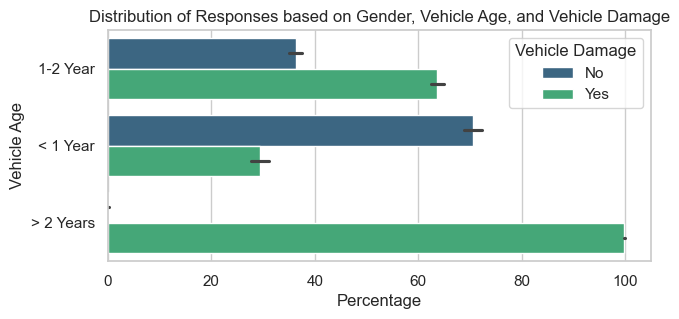

In [34]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create a bar plot
plt.figure(figsize=(7, 3))
sns.barplot(x='Percentage', y='Vehicle_Age', hue='Vehicle_Damage', data=result_df, palette='viridis')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Vehicle Age')
plt.title('Distribution of Responses based on Gender, Vehicle Age, and Vehicle Damage')

# Display the legend
plt.legend(title='Vehicle Damage', loc='upper right')

plt.savefig('gender_vs_vehicleAge_vs_damage_response.png')
# Show the plot
plt.show()

In [40]:
corr = pd.DataFrame(dataframe.select_dtypes(exclude=object).corr()['Response'])
corr

,Response
id,-0.001368
Age,0.111147
Driving_License,0.010155
Region_Code,0.010570
Previously_Insured,-0.341170
Annual_Premium,0.022575
Policy_Sales_Channel,-0.139042
Vintage,-0.001050
Response,1.000000


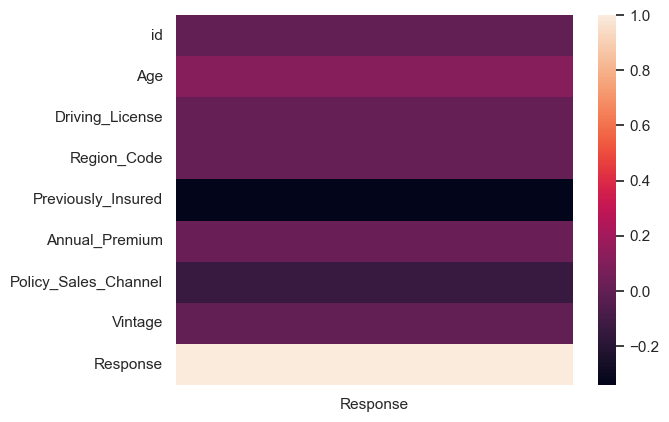

In [42]:
sns.heatmap(corr)

plt.savefig('Correlation.png')
# Show the plot
plt.show()